In [1]:
import pickle
from sqlalchemy import create_engine
import sys
import pandas as pd
import numpy as np
import secrets

In [2]:
# load db
db_conn_str = "mysql+pymysql://{:}:{:}@{:}/{:}".format(secrets.user, secrets.password, secrets.host, secrets.db)
db_conn = create_engine(db_conn_str)

df = pd.read_sql('SELECT * FROM labelled WHERE mfcc is not null', con=db_conn)
db_conn.dispose()

In [3]:
# load models
svm_linear_1 = pickle.load(open('svm_linear_1.sav', 'rb'))
svm_poly_1 = pickle.load(open('svm_poly_1.sav', 'rb'))
svm_rbf_1 = pickle.load(open('svm_rbf_1.sav', 'rb'))
svm_linear_exclude_1 = pickle.load(open('svm_linear_exclude_1.sav', 'rb'))

In [4]:
def mfccStrToArr(mfccStr):
    cleanedStr = mfccStr.replace('[', '').replace(']', '')
    str_arr = cleanedStr.split()
    result = list(map(lambda x: float(x), str_arr))
    return result

In [5]:
# make a new column with mfcc arrays
df['mfcc_arr'] = df.apply(lambda row: mfccStrToArr(row.mfcc), axis = 1)

In [6]:
# sample 100 random clips to classify
dataset = df.sample(100)

In [7]:
# classify using different svm models
y_predict_linear_1 = svm_linear_1.predict(dataset['mfcc_arr'].tolist())
y_predict_poly_1 = svm_poly_1.predict(dataset['mfcc_arr'].tolist())
y_predict_rbf_1 = svm_rbf_1.predict(dataset['mfcc_arr'].tolist())
y_predict_linear_exclude_1 = svm_linear_exclude_1.predict(dataset['mfcc_arr'].tolist())

dataset['y_predict_linear_1'] = y_predict_linear_1
dataset['y_predict_poly_1'] = y_predict_poly_1
dataset['y_predict_rbf_1'] = y_predict_rbf_1
dataset['y_predict_linear_exclude_1'] = y_predict_linear_exclude_1

In [8]:
# get youtube embeded url
def formatYoutubeUrl(url, start, end):
  embed_url = url.replace("watch?v=", "embed/")
  params = "?start={:}&end={:}&autoplay=1".format(start, end)
  return embed_url + params

def printUrls(df):
    for idx, row in df.iterrows():
        print(formatYoutubeUrl(row['url'], row['start'], row['end']))

In [9]:
# all no excitement clips svm linear
not_excited = dataset[dataset['y_predict_linear_1'] == 0]

# all slightly excitement clips svm linear
slight_excited = dataset[dataset['y_predict_linear_1'] == 1]

# all excited clips svm linear
excited = dataset[dataset['y_predict_linear_1'] == 2]

# print URLS 
print('=== NOT EXCITED ===')
printUrls(not_excited)

print('=== SLIGHT EXCITED ===')
printUrls(slight_excited)

print('=== EXCITED ===')
printUrls(excited)

=== NOT EXCITED ===
https://www.youtube.com/embed/Klm4KOAUFqc?start=3702&end=3706&autoplay=1
https://www.youtube.com/embed/A_wk85oA0Rc?start=2794&end=2798&autoplay=1
https://www.youtube.com/embed/02I5vVxlJhU?start=2474&end=2478&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=4756&end=4760&autoplay=1
https://www.youtube.com/embed/NZJPikR34bs?start=1520&end=1524&autoplay=1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4790&end=4794&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=3730&end=3734&autoplay=1
https://www.youtube.com/embed/l3ZQqdD3eEk?start=5234&end=5238&autoplay=1
https://www.youtube.com/embed/ehMCxKaj5cA?start=3164&end=3168&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=1924&end=1928&autoplay=1
https://www.youtube.com/embed/0AlFcix7aaY?start=2876&end=2880&autoplay=1
https://www.youtube.com/embed/J16IWnr_P8o?start=4930&end=4934&autoplay=1
https://www.youtube.com/embed/XT5Cn6jg-IQ?start=372&end=376&autoplay=1
https://www.youtube.com/embed/0UJ

In [10]:
# all no excitement clips svm poly
not_excited = dataset[dataset['y_predict_poly_1'] == 0]

# all slightly excitement clips svm poly
slight_excited = dataset[dataset['y_predict_poly_1'] == 1]

# all excited clips svm poly
excited = dataset[dataset['y_predict_poly_1'] == 2]

# print URLS 
print('=== NOT EXCITED ===')
printUrls(not_excited)

print('=== SLIGHT EXCITED ===')
printUrls(slight_excited)

print('=== EXCITED ===')
printUrls(excited)

=== NOT EXCITED ===
https://www.youtube.com/embed/Klm4KOAUFqc?start=3702&end=3706&autoplay=1
https://www.youtube.com/embed/02I5vVxlJhU?start=2474&end=2478&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=4756&end=4760&autoplay=1
https://www.youtube.com/embed/NZJPikR34bs?start=1520&end=1524&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=3730&end=3734&autoplay=1
https://www.youtube.com/embed/NN7UqP7n_jw?start=2358&end=2362&autoplay=1
https://www.youtube.com/embed/l3ZQqdD3eEk?start=5234&end=5238&autoplay=1
https://www.youtube.com/embed/ehMCxKaj5cA?start=3164&end=3168&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=1924&end=1928&autoplay=1
https://www.youtube.com/embed/0AlFcix7aaY?start=2876&end=2880&autoplay=1
https://www.youtube.com/embed/XT5Cn6jg-IQ?start=372&end=376&autoplay=1
https://www.youtube.com/embed/0UJdviXYGXQ?start=1412&end=1416&autoplay=1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4556&end=4560&autoplay=1
https://www.youtube.com/embed/dcs

In [11]:
# all no excitement clips svm rbf
not_excited = dataset[dataset['y_predict_rbf_1'] == 0]

# all slightly excitement clips svm rbf
slight_excited = dataset[dataset['y_predict_rbf_1'] == 1]

# all excited clips svm rbf
excited = dataset[dataset['y_predict_rbf_1'] == 2]

# print URLS 
print('=== NOT EXCITED ===')
printUrls(not_excited)

print('=== SLIGHT EXCITED ===')
printUrls(slight_excited)

print('=== EXCITED ===')
printUrls(excited)

=== NOT EXCITED ===
https://www.youtube.com/embed/Klm4KOAUFqc?start=3702&end=3706&autoplay=1
https://www.youtube.com/embed/02I5vVxlJhU?start=2474&end=2478&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=4756&end=4760&autoplay=1
https://www.youtube.com/embed/NZJPikR34bs?start=1520&end=1524&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=3730&end=3734&autoplay=1
https://www.youtube.com/embed/l3ZQqdD3eEk?start=5234&end=5238&autoplay=1
https://www.youtube.com/embed/ehMCxKaj5cA?start=3164&end=3168&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=1924&end=1928&autoplay=1
https://www.youtube.com/embed/0AlFcix7aaY?start=2876&end=2880&autoplay=1
https://www.youtube.com/embed/XT5Cn6jg-IQ?start=372&end=376&autoplay=1
https://www.youtube.com/embed/0UJdviXYGXQ?start=1412&end=1416&autoplay=1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4556&end=4560&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=3188&end=3192&autoplay=1
https://www.youtube.com/embed/Oye

In [12]:
# all no excitement clips svm linear exclude
not_excited = dataset[dataset['y_predict_linear_exclude_1'] == 0]

# all slightly excitement clips svm linear exclude
slight_excited = dataset[dataset['y_predict_linear_exclude_1'] == 1]

# all excited clips svm linear exclude
excited = dataset[dataset['y_predict_linear_exclude_1'] == 2]

# print URLS 
print('=== NOT EXCITED ===')
printUrls(not_excited)

print('=== SLIGHT EXCITED ===')
printUrls(slight_excited)

print('=== EXCITED ===')
printUrls(excited)

=== NOT EXCITED ===
https://www.youtube.com/embed/Klm4KOAUFqc?start=3702&end=3706&autoplay=1
https://www.youtube.com/embed/A_wk85oA0Rc?start=2794&end=2798&autoplay=1
https://www.youtube.com/embed/02I5vVxlJhU?start=2474&end=2478&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=4756&end=4760&autoplay=1
https://www.youtube.com/embed/NZJPikR34bs?start=1520&end=1524&autoplay=1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4790&end=4794&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=3730&end=3734&autoplay=1
https://www.youtube.com/embed/NN7UqP7n_jw?start=2358&end=2362&autoplay=1
https://www.youtube.com/embed/l3ZQqdD3eEk?start=5234&end=5238&autoplay=1
https://www.youtube.com/embed/ehMCxKaj5cA?start=3164&end=3168&autoplay=1
https://www.youtube.com/embed/dcsDhXBptmk?start=1924&end=1928&autoplay=1
https://www.youtube.com/embed/0AlFcix7aaY?start=2876&end=2880&autoplay=1
https://www.youtube.com/embed/J16IWnr_P8o?start=4930&end=4934&autoplay=1
https://www.youtube.com/embed/X

In [13]:
# try running prediction on 1 video
youtubeUrl = 'https://www.youtube.com/watch?v=Oi-GHNNCYNU' # this url was chosen at random
dataset_by_url = df[df['url'] == youtubeUrl].copy()

In [14]:
# classify using different svm models
y_predict_linear_1 = svm_linear_1.predict(dataset_by_url['mfcc_arr'].tolist())
y_predict_poly_1 = svm_poly_1.predict(dataset_by_url['mfcc_arr'].tolist())
y_predict_rbf_1 = svm_rbf_1.predict(dataset_by_url['mfcc_arr'].tolist())
y_predict_linear_exclude_1 = svm_linear_exclude_1.predict(dataset_by_url['mfcc_arr'].tolist())

dataset_by_url['y_predict_linear_1'] = y_predict_linear_1
dataset_by_url['y_predict_poly_1'] = y_predict_poly_1
dataset_by_url['y_predict_rbf_1'] = y_predict_rbf_1
dataset_by_url['y_predict_linear_exclude_1'] = y_predict_linear_exclude_1

In [15]:
for idx, row in dataset_by_url.iterrows():
    print(formatYoutubeUrl(row['url'], row['start'], row['end']), "predicted: " ,row['y_predict_linear_1'])

https://www.youtube.com/embed/Oi-GHNNCYNU?start=0&end=4&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2&end=6&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4&end=8&autoplay=1 predicted:  2
https://www.youtube.com/embed/Oi-GHNNCYNU?start=6&end=10&autoplay=1 predicted:  2
https://www.youtube.com/embed/Oi-GHNNCYNU?start=8&end=12&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=10&end=14&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=12&end=16&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=14&end=18&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=16&end=20&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=18&end=22&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=20&end=24&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=22&end=26&autoplay=1 predicted:  0
https://www.

https://www.youtube.com/embed/Oi-GHNNCYNU?start=602&end=606&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=604&end=608&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=606&end=610&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=608&end=612&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=610&end=614&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=612&end=616&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=614&end=618&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=616&end=620&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=618&end=622&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=620&end=624&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=622&end=626&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=624&end=628&autop

https://www.youtube.com/embed/Oi-GHNNCYNU?start=966&end=970&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=968&end=972&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=970&end=974&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=972&end=976&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=974&end=978&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=976&end=980&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=978&end=982&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=980&end=984&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=982&end=986&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=984&end=988&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=986&end=990&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=988&end=992&autop

https://www.youtube.com/embed/Oi-GHNNCYNU?start=1252&end=1256&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1254&end=1258&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1256&end=1260&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1258&end=1262&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1260&end=1264&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1262&end=1266&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1264&end=1268&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1266&end=1270&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1268&end=1272&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1270&end=1274&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1272&end=1276&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?s

https://www.youtube.com/embed/Oi-GHNNCYNU?start=1594&end=1598&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1596&end=1600&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1598&end=1602&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1600&end=1604&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1602&end=1606&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1604&end=1608&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1606&end=1610&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1608&end=1612&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1610&end=1614&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1612&end=1616&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1614&end=1618&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?s

https://www.youtube.com/embed/Oi-GHNNCYNU?start=1824&end=1828&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1826&end=1830&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1828&end=1832&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1830&end=1834&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1832&end=1836&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1834&end=1838&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1836&end=1840&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1838&end=1842&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1840&end=1844&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1842&end=1846&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=1844&end=1848&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?s

https://www.youtube.com/embed/Oi-GHNNCYNU?start=2274&end=2278&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2276&end=2280&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2278&end=2282&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2280&end=2284&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2282&end=2286&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2284&end=2288&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2286&end=2290&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2288&end=2292&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2290&end=2294&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2292&end=2296&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2294&end=2298&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?s

https://www.youtube.com/embed/Oi-GHNNCYNU?start=2466&end=2470&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2468&end=2472&autoplay=1 predicted:  2
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2470&end=2474&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2472&end=2476&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2474&end=2478&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2476&end=2480&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2478&end=2482&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2480&end=2484&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2482&end=2486&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2484&end=2488&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2486&end=2490&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?s

https://www.youtube.com/embed/Oi-GHNNCYNU?start=2918&end=2922&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2920&end=2924&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2922&end=2926&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2924&end=2928&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2926&end=2930&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2928&end=2932&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2930&end=2934&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2932&end=2936&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2934&end=2938&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2936&end=2940&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=2938&end=2942&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?s

https://www.youtube.com/embed/Oi-GHNNCYNU?start=3138&end=3142&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3140&end=3144&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3142&end=3146&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3144&end=3148&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3146&end=3150&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3148&end=3152&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3150&end=3154&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3152&end=3156&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3154&end=3158&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3156&end=3160&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3158&end=3162&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?s

https://www.youtube.com/embed/Oi-GHNNCYNU?start=3740&end=3744&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3742&end=3746&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3744&end=3748&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3746&end=3750&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3748&end=3752&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3750&end=3754&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3752&end=3756&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3754&end=3758&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3756&end=3760&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3758&end=3762&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=3760&end=3764&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?s

https://www.youtube.com/embed/Oi-GHNNCYNU?start=4270&end=4274&autoplay=1 predicted:  2
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4272&end=4276&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4274&end=4278&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4276&end=4280&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4278&end=4282&autoplay=1 predicted:  2
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4280&end=4284&autoplay=1 predicted:  2
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4282&end=4286&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4284&end=4288&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4286&end=4290&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4288&end=4292&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4290&end=4294&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?s

https://www.youtube.com/embed/Oi-GHNNCYNU?start=4528&end=4532&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4530&end=4534&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4532&end=4536&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4534&end=4538&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4536&end=4540&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4538&end=4542&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4540&end=4544&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4542&end=4546&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4544&end=4548&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4546&end=4550&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4548&end=4552&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?s

https://www.youtube.com/embed/Oi-GHNNCYNU?start=4890&end=4894&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4892&end=4896&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4894&end=4898&autoplay=1 predicted:  0
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4896&end=4900&autoplay=1 predicted:  2
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4898&end=4902&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4900&end=4904&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4902&end=4906&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4904&end=4908&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4906&end=4910&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4908&end=4912&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?start=4910&end=4914&autoplay=1 predicted:  1
https://www.youtube.com/embed/Oi-GHNNCYNU?s

In [67]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def secondsToTime(secs):
    m, s = divmod(secs, 60)
    return "{:}:{:}".format(m, s)

def realTimeHypeGraph(dataset):
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    plt.ion()

    fig.show()
    fig.canvas.draw()

    x = []
    y1 = []
    y2 = []
    y3 = []

    for idx, row in dataset.iterrows():
        ax.clear()
        ax.set_ylim([-0.5, 2.5])
        
        videoTime = row['start'] / 60
        x.append(videoTime)
        y1.append(row['y_predict_linear_1'])
        y2.append(row['y_predict_poly_1'] + 0.02)
        y3.append(row['y_predict_rbf_1'] - 0.02)

        ax.plot(x[-20:], y1[-20:], label='svm_linear', alpha=0.7)
        ax.plot(x[-20:], y2[-20:], label='svm_poly', alpha=0.7)
        ax.plot(x[-20:], y3[-20:], label='svm_rbf', alpha=0.7)
        
        plt.xlabel('Time (s)')
        plt.ylabel('Excitement')
        plt.legend()
        
        fig.canvas.draw()
        time.sleep(2)

In [17]:
from IPython.display import HTML

youtubeEmbedUrl = youtubeUrl.replace('watch?v=', 'embed/')
# Youtube
HTML("<iframe width='560' height='315' src='{:}'</iframe>".format(youtubeEmbedUrl))

/Users/tylerlam/.pyenv/versions/3.7.6/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


<IPython.core.display.Javascript object>


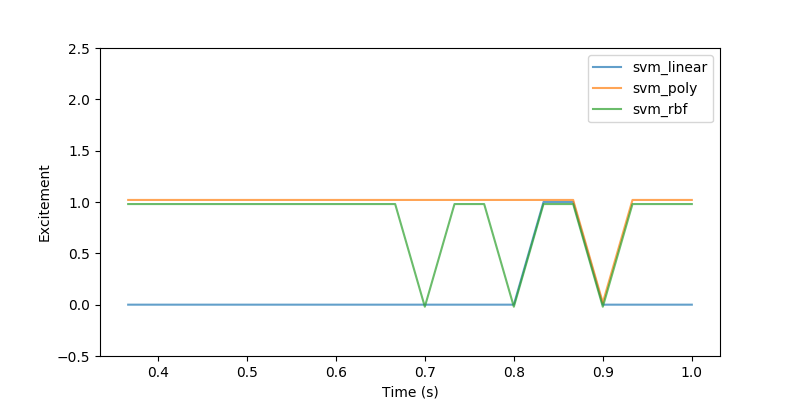

KeyboardInterrupt: 

In [69]:
# run this cell right before you click play on the youtube video
dataset = dataset_by_url[dataset_by_url['start'] >= 0] # you can customize the start time here
realTimeHypeGraph(dataset)

NameError: name 'x' is not defined